<a href="https://colab.research.google.com/github/wizard339/education/blob/main/random_walk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В этом блоке мы познакомимся со случайными блужданиями.

Узнаем, что это такое, как их можно построить и в каких случаях они стационарны

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

рассмотрим такую задачу: Очень нерешительный таракан Афанасий путешествует по числовой прямой. В каждый момент времени он подбрасывает монетку: если выпал орел, идет на один сантиметр вперед, а если решка, то назад.

Такие последовательности называются случайными блужданиями. В них каждое следующее положение получается из предыдущего добавлением какого-нибудь белого шума. В нашем случае - равномерного со значениями -1 и 1. Другими словами, приращения случайных блужданий  - белый шум, то есть абсолютно случайны.
Создадим функцию, которая будет генерировать последовательность координат Афанасия на прямой

Uni означает, что в качестве случайности берется равновероятная (Uniform) модель

rwalk - random walk. 

In [2]:
def unirwalk(num):
    uwalk = np.zeros(num)
    for i in range (1, num):
        # random.randint(-1,1) имитирует подброс монетки. Афанасий сдвигается на один см влево (-1) или вправо (1)
        # относительно прыдыдущего положения uwalk[i-1]
        uwalk[i] = uwalk[i-1] + random.randint(-1, 1) 
    return uwalk

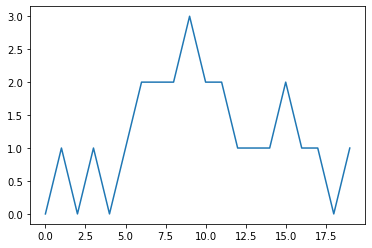

In [3]:
# посмотрим, как будет выглядеть блуждание на 20 шагах
walk = unirwalk(20)
plt.plot(walk)

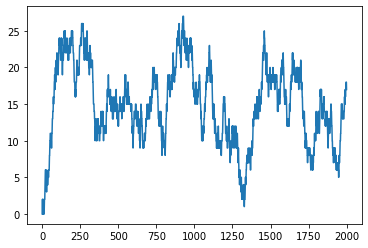

In [4]:
# посмотрим, как будет выглядеть блуждание на 2000 шагах
walk2 = unirwalk(2000)
plt.plot(walk2)

Чем больше временной интервал, тем дальше будет удалаяться Афанасий от точки старта

In [5]:
# среднее значение и стандартное отклонение случайного блуждания:
print('mean и std для num=20:', np.mean(walk), np.std(walk))
print('mean и std для num=2000:', np.mean(walk2), np.std(walk2))

mean и std для num=20: 1.2 0.812403840463596
mean и std для num=2000: 14.953 5.361696653112706


Давайте создадим нормальное случайное блуждание

In [6]:
# num - число шагов
# a - множитель. В каждый момент времени следующее значение равно a*текущее + белый шум
# mu, sigma - параметры шума
def normrwalk(num, a, mu, sigma):
    eps = np.random.normal(mu, sigma, size=num)
    walk = np.zeros(num)
    walk[0] = eps[0]
    for i in range (1, num):
        walk[i] = a*walk[i-1] + eps[i]
    return walk
    

Давайте посмотрим, как ведет себя нормальное случайное блуждание для значения a=0.1, 0.5, 0.9, и 1

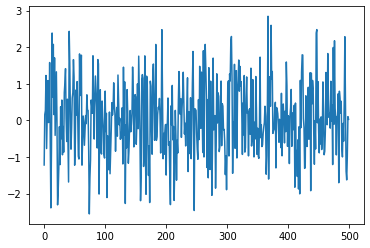

In [7]:
a = 0.1
n_walk_01 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_01)

In [8]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера

test = sm.tsa.adfuller(n_walk_01)
print ('p-value: ', test[1])
if test[1] < 0.05: 
    print ('ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  0.0
ряд стационарен


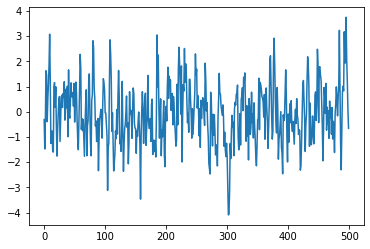

In [9]:
a = 0.5
n_walk_05 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_05)

In [10]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_05)
print ('p-value: ', test[1])
if test[1] < 0.05: 
    print (' ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  1.8994392431823182e-19
 ряд стационарен


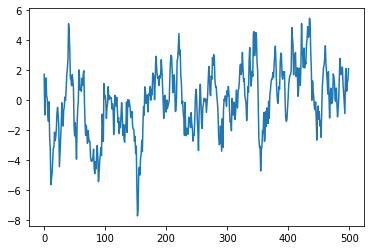

In [11]:
a = 0.9
n_walk_09 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_09)

In [12]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_09)
print ('p-value: ', test[1])
if test[1]< 0.05: 
    print ('ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  2.4286423114886226e-06
ряд стационарен


При а=1 ряд резко меняет поведение и перестает быть стационарным! Это так называемый случай единичного корня, на идее которого и работает тест Дикки-Фуллера

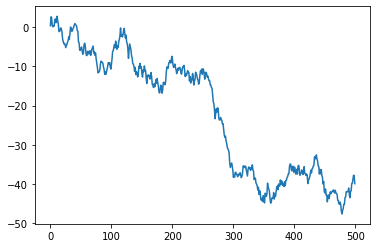

In [13]:
a = 1
n_walk_1 = normrwalk(500, a, 0, 1)
plt.plot(n_walk_1)

In [14]:
# Протестируем стационарность ряда при помощи теста Дикки-Фуллера
test = sm.tsa.adfuller(n_walk_1)
print ('p-value: ', test[1])
if test[1] < 0.05: 
    print ('ряд стационарен')
else:
    print ('ряд не стационарен')

p-value:  0.7581324603627757
ряд не стационарен
